# Real Time Control using Simpy

In [16]:
import simpy.rt
from TClab import TClab
env = simpy.rt.RealtimeEnvironment(strict=False)

a = TClab()

SP = 40.0
def control(env):
    while True:
        a.Q1 = 100 if a.T1 <= SP else 0
        yield env.timeout(1)
         
def reporter(env):
    while True:
        print('{0:7.2f}   {1:7.2f}  {2:7.2f}'.format(env.now, a.Q1, a.T1), flush=True)
        yield env.timeout(5)
        
env.process(control(env))
env.process(reporter(env))
env.run(until=200)

# shutdown heater
a.Q1 = 0

Opening connection
TClab connected via Arduino on port /dev/tty.wchusbserial1410
   0.00    100.00    37.01
   5.00    100.00    36.69
  10.00    100.00    36.69
  15.00    100.00    37.01
  20.00    100.00    37.66
  25.00    100.00    38.62
  30.00    100.00    40.23
  35.00      0.00    41.52
  40.00      0.00    42.49
  45.00      0.00    43.46
  50.00      0.00    43.78
  55.00      0.00    43.78
  60.00      0.00    43.78
  65.00      0.00    43.78
  70.00      0.00    43.13
  75.00      0.00    43.13
  80.00      0.00    42.81
  85.00      0.00    42.17
  90.00      0.00    41.85
  95.00      0.00    41.52
 100.00      0.00    41.20
 105.00      0.00    40.56
 110.00      0.00    39.91
 115.00    100.00    39.91
 120.00    100.00    39.59
 125.00    100.00    39.91
 130.00      0.00    40.56
 135.00      0.00    41.52
 140.00      0.00    41.85
 145.00      0.00    41.85
 150.00      0.00    41.85
 155.00      0.00    41.85
 160.00      0.00    41.52
 165.00      0.00    41.20
 

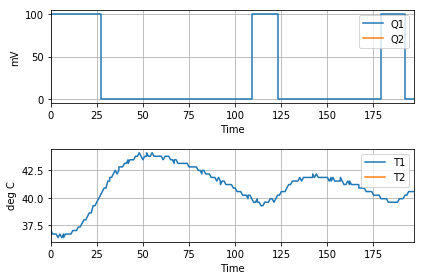

In [17]:
a.plot()